<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Four_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
!pip install yfinance;

In [4]:
from pandas_datareader.data import DataReader
import yfinance as yf

In [5]:
from datetime import datetime

In [6]:
stok_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [8]:
for stock in stok_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-09,3257.469971,3276.689941,3205.000000,3223.790039,3223.790039,3439300,AMAZON
2022-02-10,3167.000000,3214.330078,3155.000000,3180.070068,3180.070068,3413400,AMAZON
2022-02-11,3162.689941,3180.000000,3054.679932,3065.870117,3065.870117,3851600,AMAZON
2022-02-14,3035.020020,3168.969971,3033.000000,3103.340088,3103.340088,4161500,AMAZON
2022-02-15,3152.110107,3160.139893,3092.750000,3130.209961,3130.209961,2848500,AMAZON
2022-02-16,3115.810059,3176.679932,3094.689941,3162.010010,3162.010010,2635200,AMAZON
2022-02-17,3162.919922,3206.979980,3090.000000,3093.050049,3093.050049,3201600,AMAZON
2022-02-18,3109.989990,3109.989990,3017.860107,3052.030029,3052.030029,3168200,AMAZON
2022-02-22,3009.570068,3059.649902,2969.709961,3003.949951,3003.949951,3306400,AMAZON


In [10]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,146.076496,147.623307,144.624574,146.172008,145.724049,8.937575e+07
std,17.383659,17.675579,17.133350,17.397516,17.580193,2.845325e+07
min,119.029999,120.400002,116.209999,116.360001,115.672501,4.100000e+07
25%,130.454998,131.734997,129.472500,130.669998,130.063187,6.889110e+07
50%,146.120003,147.285004,145.410004,146.144997,145.716400,8.453615e+07
75%,158.467503,160.877502,155.945000,158.882500,158.680336,1.054095e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-23 to 2022-02-23
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


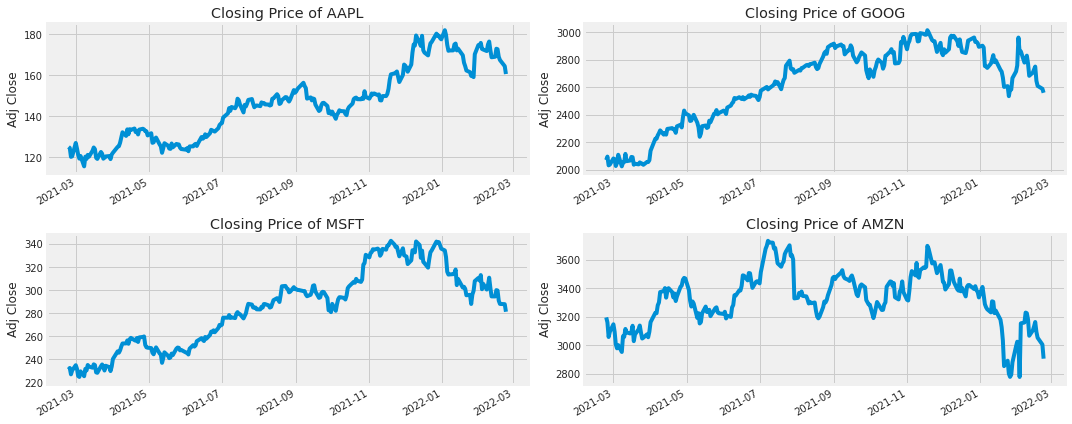

In [16]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stok_list[i - 1]}")
    plt.tight_layout()

Plot total volume of stocks treaded in a day

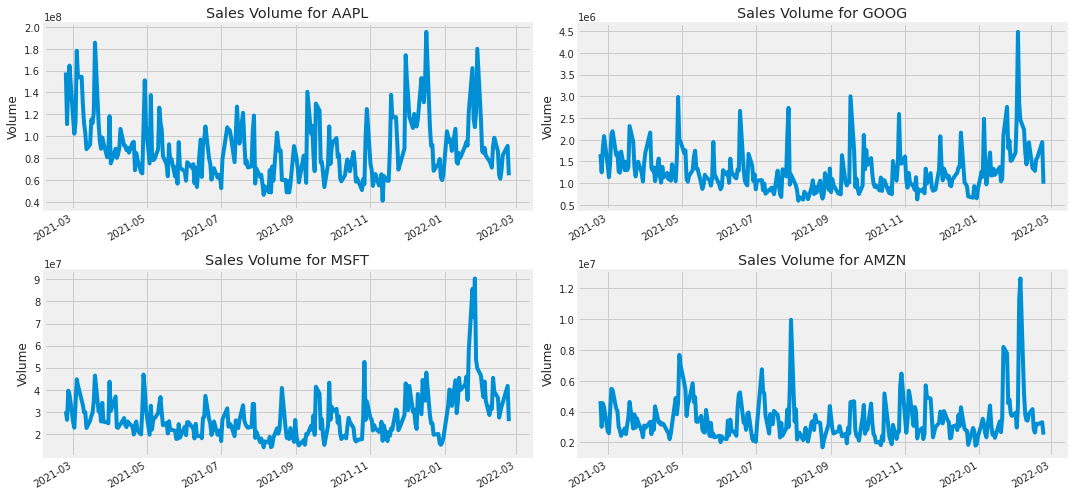

In [17]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stok_list[i - 1]}")
    
plt.tight_layout()

#Plot moving average of the various stocks

In [18]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

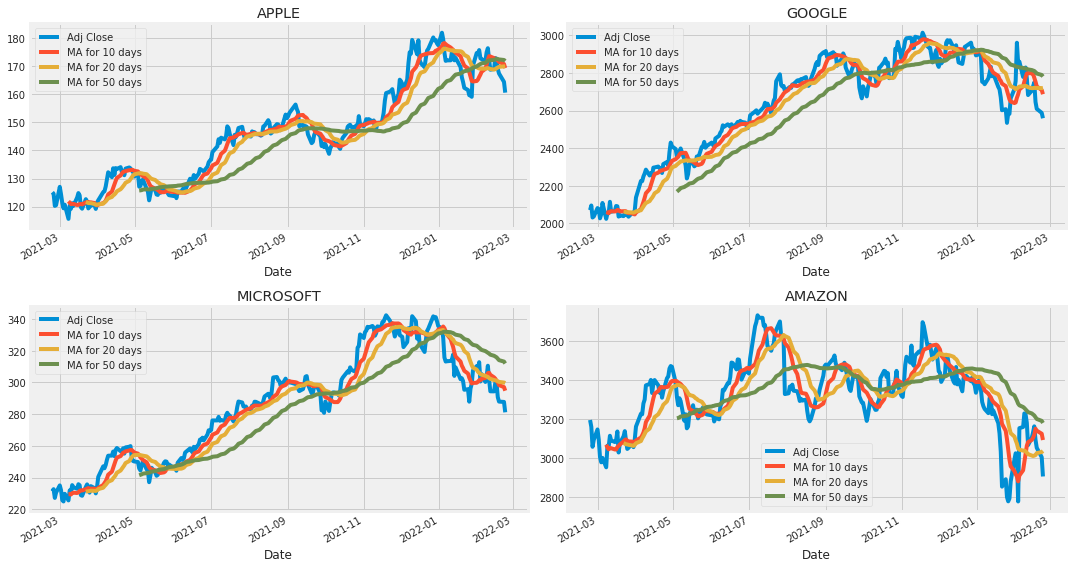

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
fig.tight_layout()

What was the daily return of the stock on average?

In [24]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
  

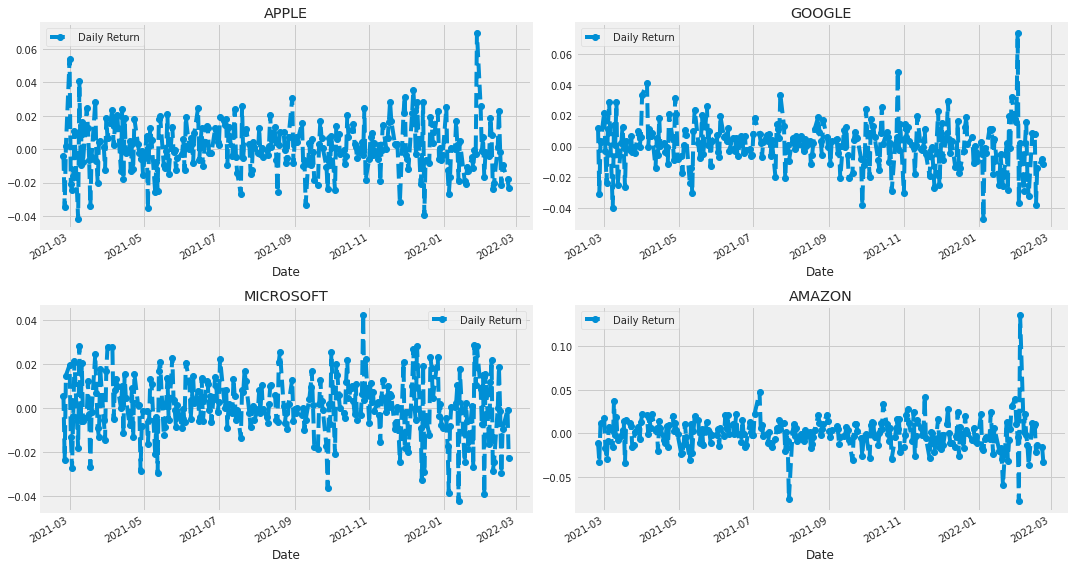

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

#Average daily return using histogram

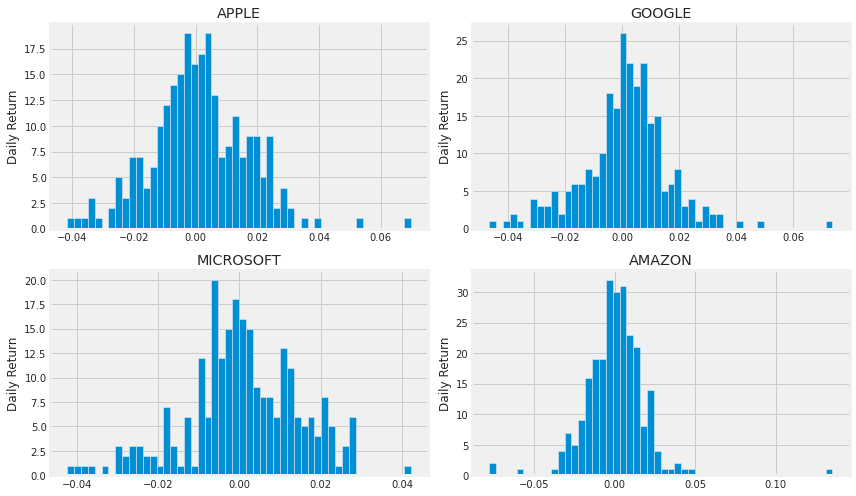

In [27]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

#To get correlation between different stock price

In [32]:
closing_df = YahooDailyReader(stok_list, 'yahoo', start, end)['Adj Close']

NameError: ignored

In [34]:
import pandas
from pandas_datareader import data as pdr
yf.pdr_override()

In [37]:
closing_df = pdr.get_data_yahoo(stok_list, start, end)['Adj Close']
print(closing_df)

[*********************100%***********************]  4 of 4 completed
                  AAPL         AMZN         GOOG        MSFT
Date                                                        
2021-02-23  125.116371  3194.500000  2070.860107  231.385269
2021-02-24  124.609383  3159.530029  2095.169922  232.654953
2021-02-25  120.275139  3057.159912  2031.359985  227.139847
2021-02-26  120.543549  3092.929932  2036.859985  230.502472
2021-03-01  127.034966  3146.139893  2081.510010  235.025620
...                ...          ...          ...         ...
2022-02-16  172.550003  3162.010010  2749.750000  299.500000
2022-02-17  168.880005  3093.050049  2646.169922  290.730011
2022-02-18  167.300003  3052.030029  2609.350098  287.929993
2022-02-22  164.320007  3003.949951  2588.050049  287.720001
2022-02-23  160.070007  2896.540039  2551.699951  280.269989

[254 rows x 4 columns]


In [38]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-02-23,125.116371,3194.500000,2070.860107,231.385269
2021-02-24,124.609383,3159.530029,2095.169922,232.654953
2021-02-25,120.275139,3057.159912,2031.359985,227.139847
2021-02-26,120.543549,3092.929932,2036.859985,230.502472
2021-03-01,127.034966,3146.139893,2081.510010,235.025620


In [39]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-02-23,NaN,NaN,NaN,NaN
2021-02-24,-0.004052,-0.010947,0.011739,0.005487
2021-02-25,-0.034783,-0.032400,-0.030456,-0.023705
2021-02-26,0.002232,0.011700,0.002708,0.014804
2021-03-01,0.053851,0.017204,0.021921,0.019623


In [ ]:
#Comparing Google to itself should show a perfectly linear relationship

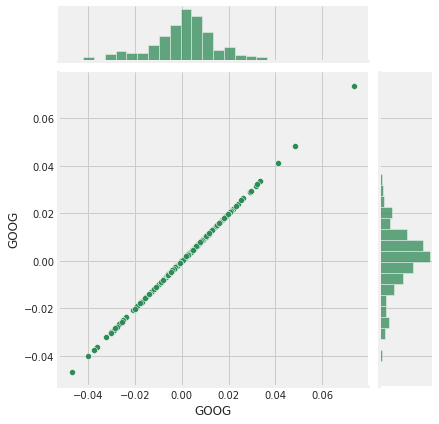

In [40]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

#Use joint plot to compare the daily returns of googl and microsoft 

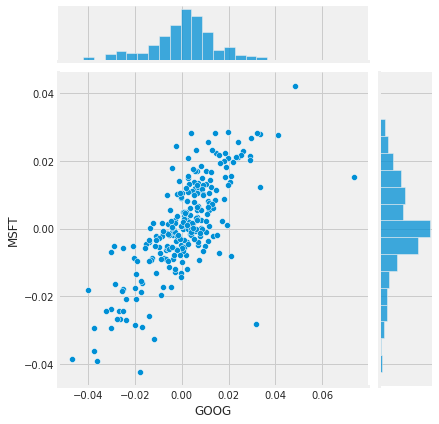

In [41]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

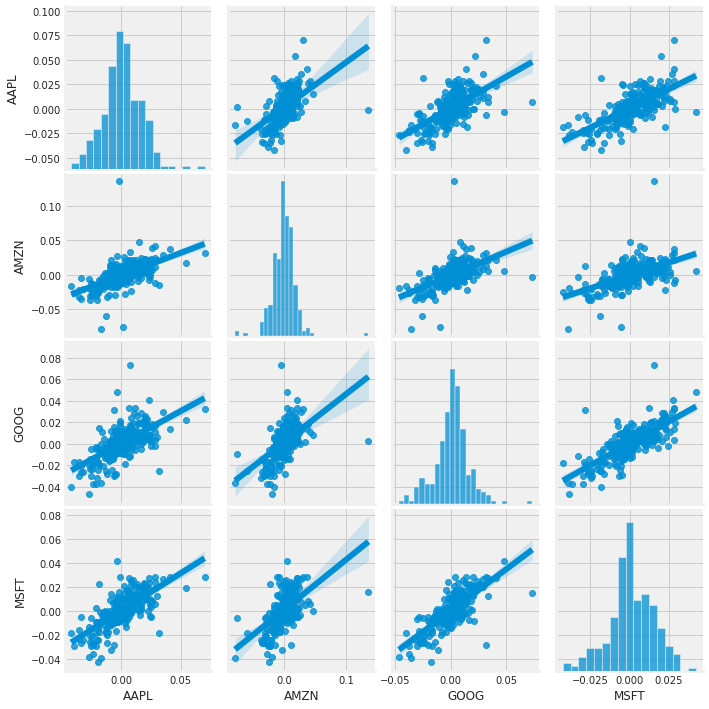

In [42]:
sns.pairplot(tech_rets, kind='reg')

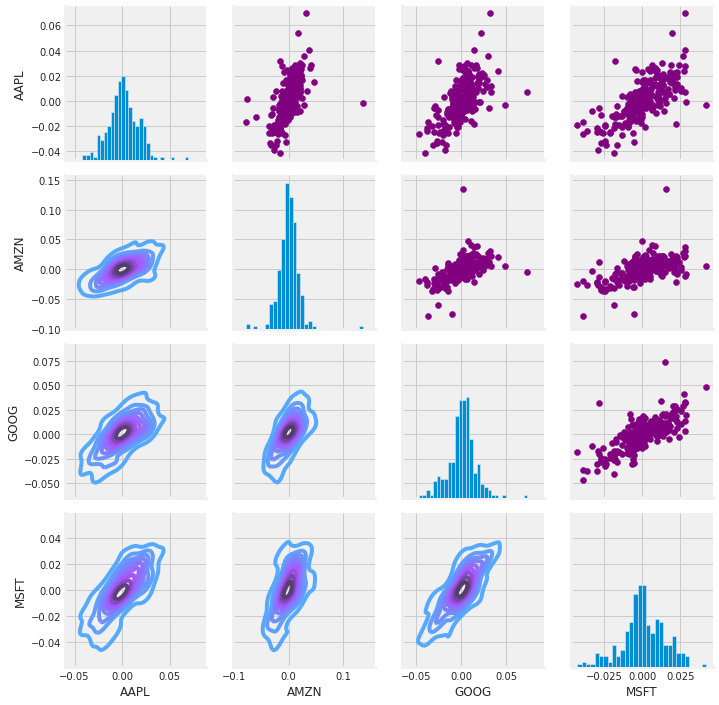

In [44]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

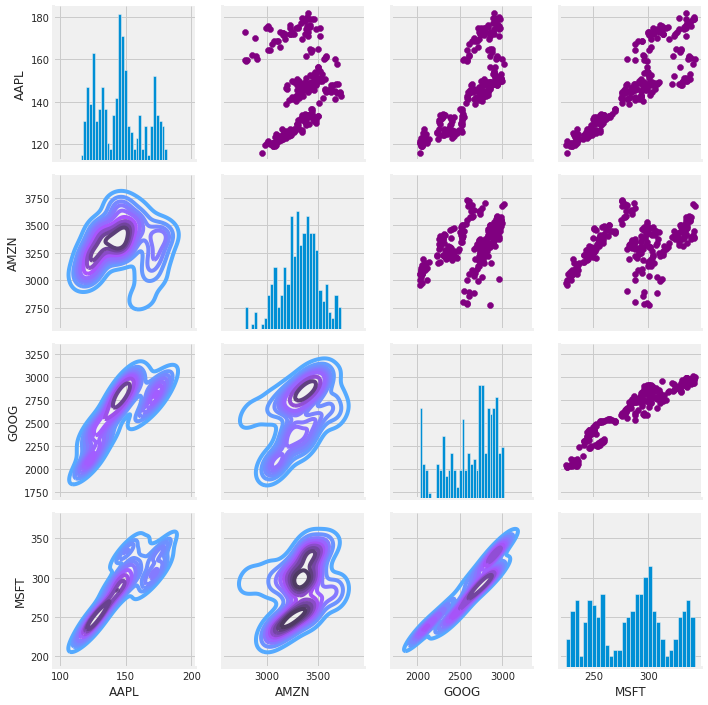

In [45]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

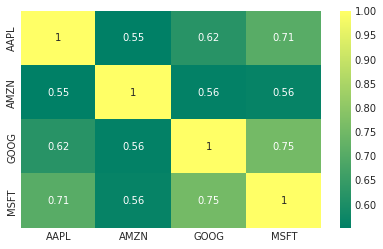

In [46]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

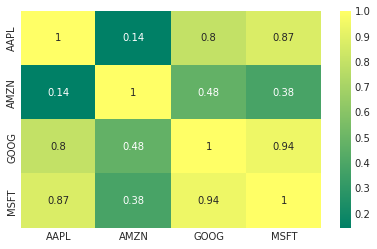

In [47]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

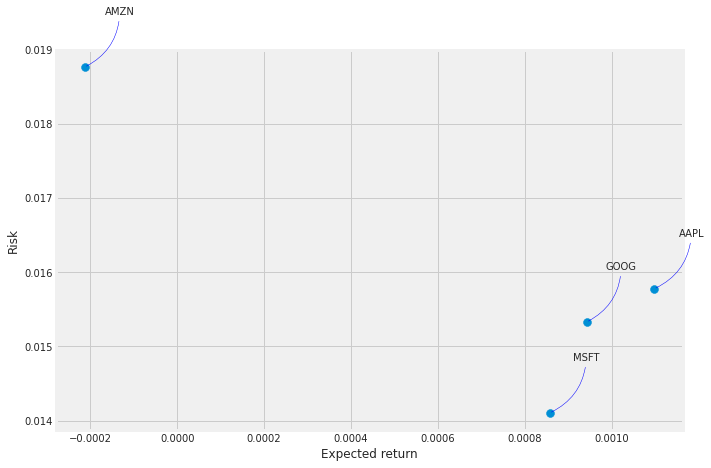

In [48]:
rets = tech_rets.dropna()
area = np.pi * 20
plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#Predicting a closing price stock price of Apple

In [53]:
df = pdr.get_data_yahoo('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.116371,158273000
2021-02-24,124.940002,125.559998,122.230003,125.349998,124.609383,111039900
2021-02-25,124.680000,126.459999,120.540001,120.989998,120.275146,148199500
2021-02-26,122.589996,124.849998,121.199997,121.260002,120.543556,164560400
2021-03-01,123.750000,127.930000,122.790001,127.790001,127.034973,116307900


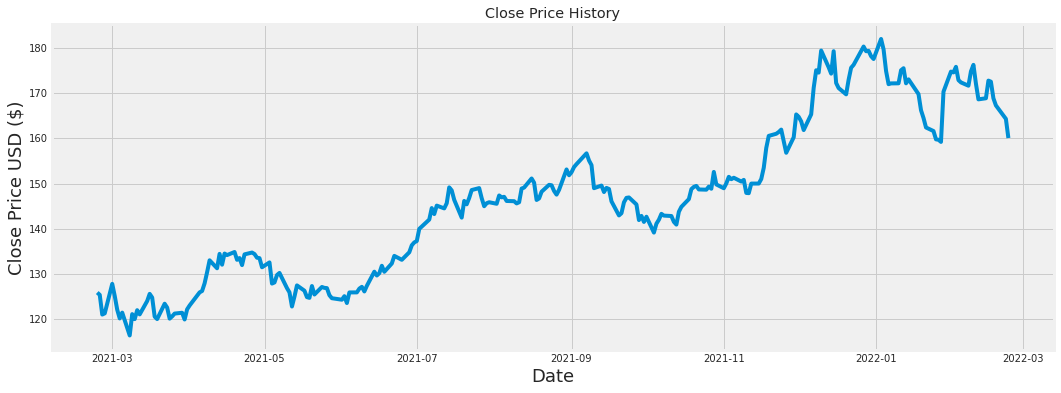

In [54]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [57]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

242

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14470679],
       [0.13693829],
       [0.07052548],
       [0.07463826],
       [0.17410512],
       [0.13343493],
       [0.08682403],
       [0.0574257 ],
       [0.07707537],
       [0.        ],
       [0.07204868],
       [0.05514095],
       [0.08530082],
       [0.07113478],
       [0.11622236],
       [0.14028941],
       [0.12795129],
       [0.06351864],
       [0.05529318],
       [0.10708301],
       [0.09413558],
       [0.05681639],
       [0.06443254],
       [0.0738766 ],
       [0.07661842],
       [0.05392233],
       [0.088195  ],
       [0.10114242],
       [0.1453161 ],
       [0.15003807],
       [0.17578069],
       [0.21325211],
       [0.25346536],
       [0.22665661],
       [0.27524743],
       [0.23869002],
       [0.2763138 ],
       [0.27113488],
       [0.28149273],
       [0.25514092],
       [0.26108151],
       [0.23731917],
       [0.2735721 ],
       [0.27966492],
       [0.27463824],
       [0.26230012],
       [0.2607768 ],
       [0.230

In [60]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.14470679, 0.13693829, 0.07052548, 0.07463826, 0.17410512,
       0.13343493, 0.08682403, 0.0574257 , 0.07707537, 0.        ,
       0.07204868, 0.05514095, 0.08530082, 0.07113478, 0.11622236,
       0.14028941, 0.12795129, 0.06351864, 0.05529318, 0.10708301,
       0.09413558, 0.05681639, 0.06443254, 0.0738766 , 0.07661842,
       0.05392233, 0.088195  , 0.10114242, 0.1453161 , 0.15003807,
       0.17578069, 0.21325211, 0.25346536, 0.22665661, 0.27524743,
       0.23869002, 0.2763138 , 0.27113488, 0.28149273, 0.25514092,
       0.26108151, 0.23731917, 0.2735721 , 0.27966492, 0.27463824,
       0.26230012, 0.2607768 , 0.23000773, 0.2464584 , 0.17501902,
       0.17882721, 0.20380817, 0.21096736, 0.15978673, 0.14546845,
       0.09763894, 0.13115006, 0.16892608, 0.15095197, 0.12932214])]
[0.12688503587965716]

[array([0.14470679, 0.13693829, 0.07052548, 0.07463826, 0.17410512,
       0.13343493, 0.08682403, 0.0574257 , 0.07707537, 0.        ,
       0.07204868, 0.05514095, 0.08

In [62]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [63]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [64]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [66]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

182/182 [==============================] - 9s 32ms/step - loss: 0.0154


In [70]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [73]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [74]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.708964635681084

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


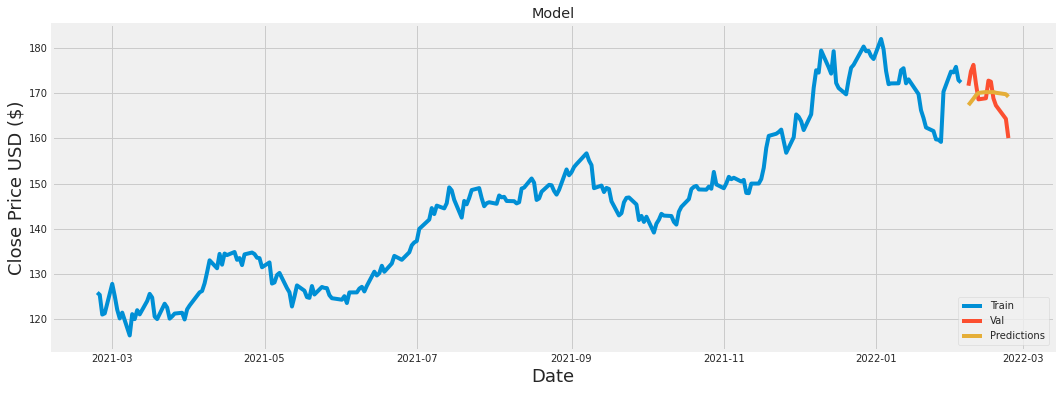

In [76]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [77]:
valid

,Close,Predictions
Date,,
2022-02-07,171.660004,167.372635
2022-02-08,174.830002,168.065552
2022-02-09,176.279999,168.782974
2022-02-10,172.119995,169.536194
2022-02-11,168.639999,170.064606
2022-02-14,168.880005,170.253052
2022-02-15,172.789993,170.221985
2022-02-16,172.550003,170.233459
2022-02-17,168.880005,170.252853
